In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
def gradient_descent(gradient, start, learn_rate, n_iter=50, tolerance=1e-06, momentum=0.5):
    diff = 0.0
    vector = start
    for _ in range(n_iter):
        # momentum_val = momentum * diff # diff is from previous time step bc it hasn't been update yet
        diff = - learn_rate * gradient(vector)# + momentum_val
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
        yield vector
    return vector


In [66]:
# function : v^2

In [70]:
points = [point for point in gradient_descent(gradient=lambda v: 2*v, start=10.0, n_iter=50, learn_rate=0.02)];

In [71]:
len(points)

50

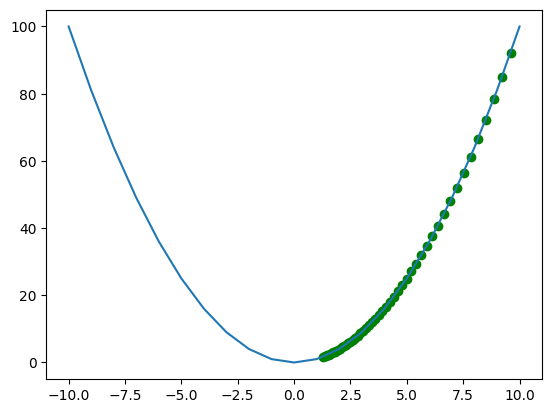

In [72]:
plt.scatter(points, np.array(points)**2, c="green")
plt.plot([i for i in np.arange(-10, 11)], [i**2 for i in np.arange(-10, 11)])

In [36]:
gradient_descent(
    gradient=lambda v: 4 * v**3 - 10 * v - 3, start=0,
    learn_rate=0.5
)

<generator object gradient_descent at 0x7fe9e42f62e0>

In [53]:
points = [point for point in gradient_descent(gradient=lambda v: 4 * v**3 - 10 * v - 3, start=-3.0, n_iter=len(np.linspace(-3, 3))*60, learn_rate=0.01)];

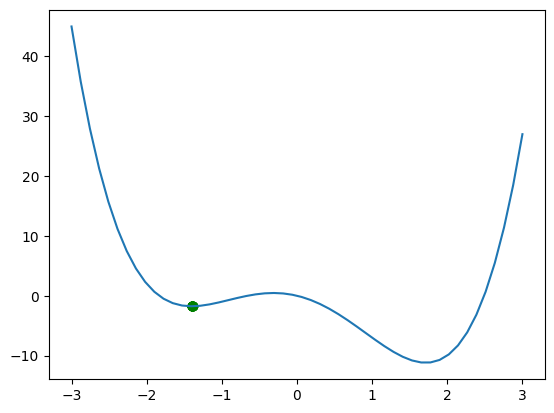

In [51]:
plt.scatter(points, np.array(points)**4 - 5*np.array(points)**2 - 3*np.array(points), c="green")
plt.plot([i for i in np.linspace(-3, 3)], [i**4 - 5*i**2 - 3*i for i in np.linspace(-3, 3)])

In [180]:
gradient_descent(
    gradient=lambda v: np.array([2 * v[0], 4 * v[1]**3]),
    start=np.array([1.0, 1.0]), learn_rate=0.2, tolerance=1e-08
)

array([8.08281277e-12, 9.75207120e-02])

In [181]:
# psuedo code - gradient descent with momentum
# set learning rate (ie step size)
# calculate gradient
#  - calculate gradients with respect to each parameter
# multiply the learning rate by the negative gradient to get the size of the change
# multiple momentum rate by change from previous step (ie change_x(t-1))
# add momentum to current change value
# add change to vector of current location

In [253]:
def ssr_gradient(x, y, b):
    res = b[0] + b[1] * x - y
    return res.mean(), (res * x).mean()  # .mean() is a method of np.ndarray

In [269]:
def sgd(gradient, x, y, n_vars=None, start=None, learn_rate=0.1, 
        batch_size=1, n_iter=50, tolerance=1e-06,
        dtype="float32", random_state=None):
    
    # check that gradient is callable
    if not callable(gradient):
        raise TypeError("'gradient' must be a callable")
        
    # set up data type for arrays
    dtype_ = np.dtype(dtype)
    
    # convert x and y to NumPy arrays
    x, y = np.array(x, dtype=dtype_), np.array(y, dtype=dtype_)
    n_samples = x.shape[0]
    if n_samples != y.shape[0]:
        raise ValueError("'x' and 'y' lengths do not match")
    xy_test = np.concatenate([x.reshape(n_samples, -1), y.reshape(n_samples, 1)], axis=-1)

In [270]:
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])
sgd(ssr_gradient, x, y)

[[ 5.  5.]
 [15. 20.]
 [25. 14.]
 [35. 32.]
 [45. 22.]
 [55. 38.]]
[[ 5.  5.]
 [15. 20.]
 [25. 14.]
 [35. 32.]
 [45. 22.]
 [55. 38.]]
